In [1]:
import sys
import os
root_path = "/mnt/brain5/scratch/wcarvalh/projects/rljax/"
sys.path.append(root_path)
print("Started")
print(os.getcwd())

Started
/mnt/brain5/scratch/wcarvalh/projects/rljax/analysis


In [115]:
import jax
from pprint import pprint
import jax.numpy as jnp
import json

from glob import glob
from pprint import pprint
import cloudpickle

import numpy as np
import matplotlib.pyplot as plt

# from vistools.video_maker import VideoMaker
from vistools import video_tools
from projects.kitchen_gridworld import plot_tools
from acme.wrappers.video import make_animation

%load_ext autoreload
%autoreload 2
%matplotlib inline 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Get File

In [3]:
def single_path(path_search):
  options = glob(path_search)
  return options[0]


basepath = 'results/kitchen_grid/final'
searches = dict(
      msf='capacity1/*msf*0.01*',
      # msf='relate_ablate4/*rel*', # model, not relational
      # usfa_lstm='baselines3/*usfa_lstm,*', # 
      # uvfa='baselines3/*r2d1*', # 
    )

directories = []
for agent, agent_search in searches.items():
    path_search = os.path.join(root_path, basepath, agent_search)
    path = single_path(path_search)

    episode_data_options = glob(os.path.join(path, "seed=*", "episode_data/data.npz"))
    episode_data = episode_data_options[0]

    config_options = glob(os.path.join(path, "seed=*", "config.json"))
    config = config_options[0]
    break

#     cuda_idx = 0
#     for seed_path in seed_paths:
#         directories.append(seed_path)

print(episode_data)
# pprint(directories)

/mnt/brain5/scratch/wcarvalh/projects/rljax/results/kitchen_grid/final/capacity1/agen=msf,sett=multiv1,task=pickup,room=5,num_=0,phi_=0.01,out_=512,lang=126,max_=30000000/seed=1/episode_data/data.npz


# Load data

In [4]:
with open(episode_data, 'rb') as f:
    data = cloudpickle.load(f)
    
with open(config, 'r') as f:
    config = json.load(f)

In [117]:
data.keys()

dict_keys(['pickup_cleaned', 'slice', 'pickup', 'pickup_sliced', 'slice2', 'toggle2', 'clean', 'toggl2'])

# Agreement plots

Figsize: (29, 4)


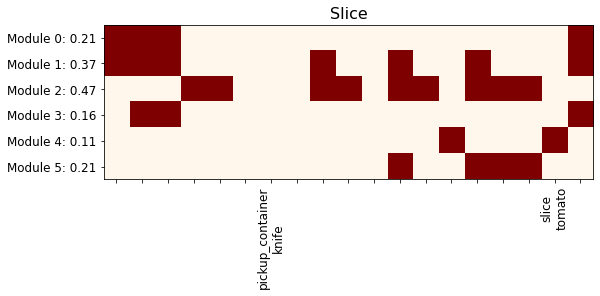

In [170]:
episodes = plot_tools.split_episodes(data['slice'])

fix, axs = video_tools.make_grid(
    boxes=dict(
        # obs=dict(x=[0,4], y=[0,4]),
        q=dict(x=[0, len(ims)], y=[0,4]),
    ),
)

plot_tools.plot_agreement(
    ax=axs['q'],
    episode=episodes['success'][3],
    config=config,
    option='z',
    title='slice',
)

Figsize: (29, 4)


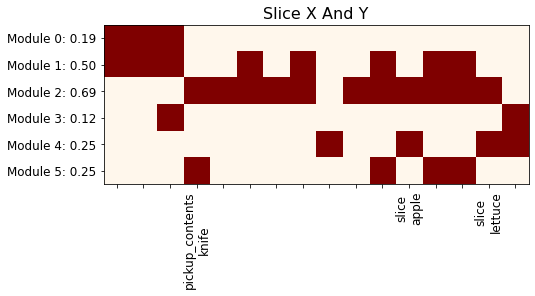

In [168]:
episodes = plot_tools.split_episodes(data['slice2'])

fix, axs = video_tools.make_grid(
    boxes=dict(
        # obs=dict(x=[0,4], y=[0,4]),
        q=dict(x=[0, len(ims)], y=[0,4]),
    ),
)

plot_tools.plot_agreement(
    ax=axs['q'],
    episode=episodes['success'][3],
    config=config,
    option='z',
    title='Slice X and Y',
)

Figsize: (29, 4)


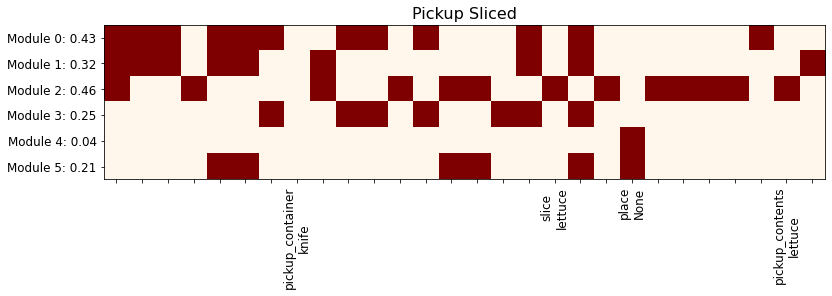

In [172]:
episodes = plot_tools.split_episodes(data['pickup_sliced'])

fix, axs = video_tools.make_grid(
    boxes=dict(
        # obs=dict(x=[0,4], y=[0,4]),
        q=dict(x=[0, len(ims)], y=[0,4]),
    ),
)

plot_tools.plot_agreement(
    ax=axs['q'],
    episode=episodes['success'][1],
    config=config,
    option='z',
    title='pickup_sliced',
)

Figsize: (29, 4)


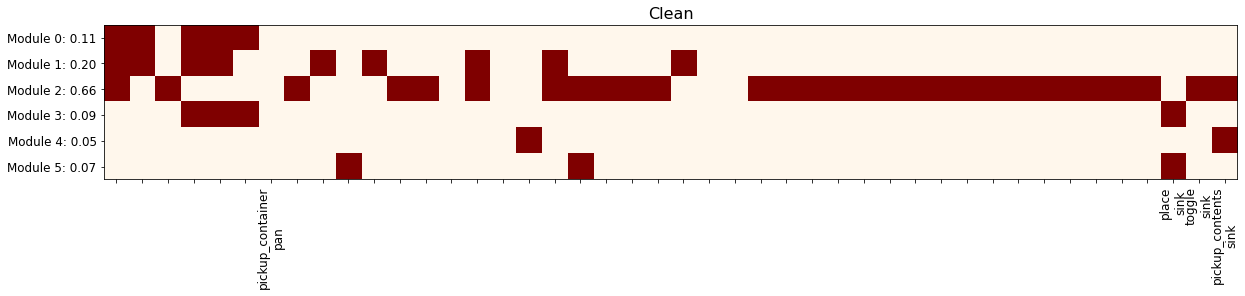

In [171]:
episodes = plot_tools.split_episodes(data['clean'])

fix, axs = video_tools.make_grid(
    boxes=dict(
        # obs=dict(x=[0,4], y=[0,4]),
        q=dict(x=[0, len(ims)], y=[0,4]),
    ),
)

plot_tools.plot_agreement(
    ax=axs['q'],
    episode=episodes['success'][3],
    config=config,
    option='z',
    title='clean',
)

# Creating video

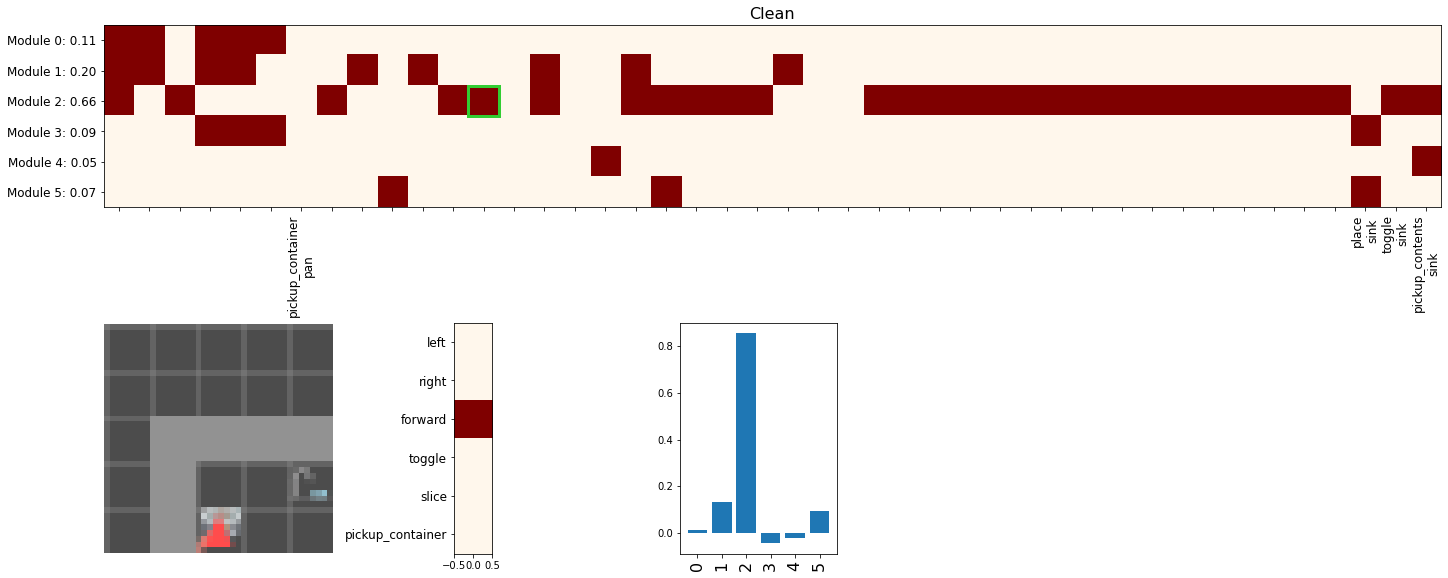

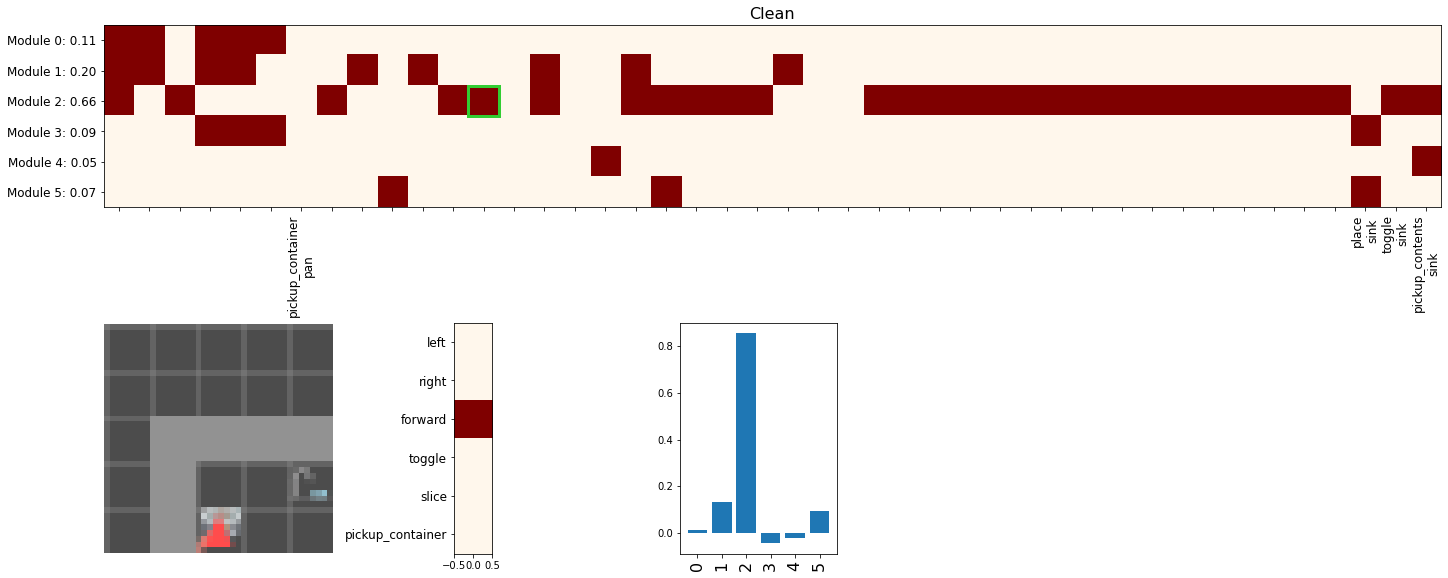

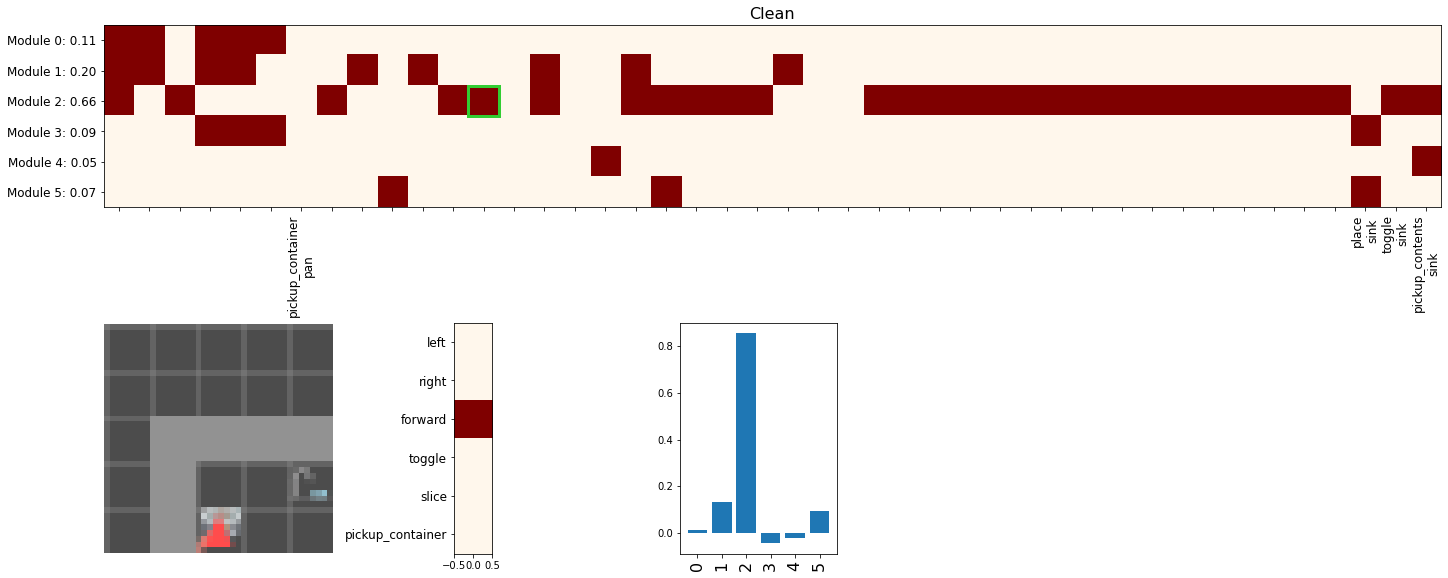

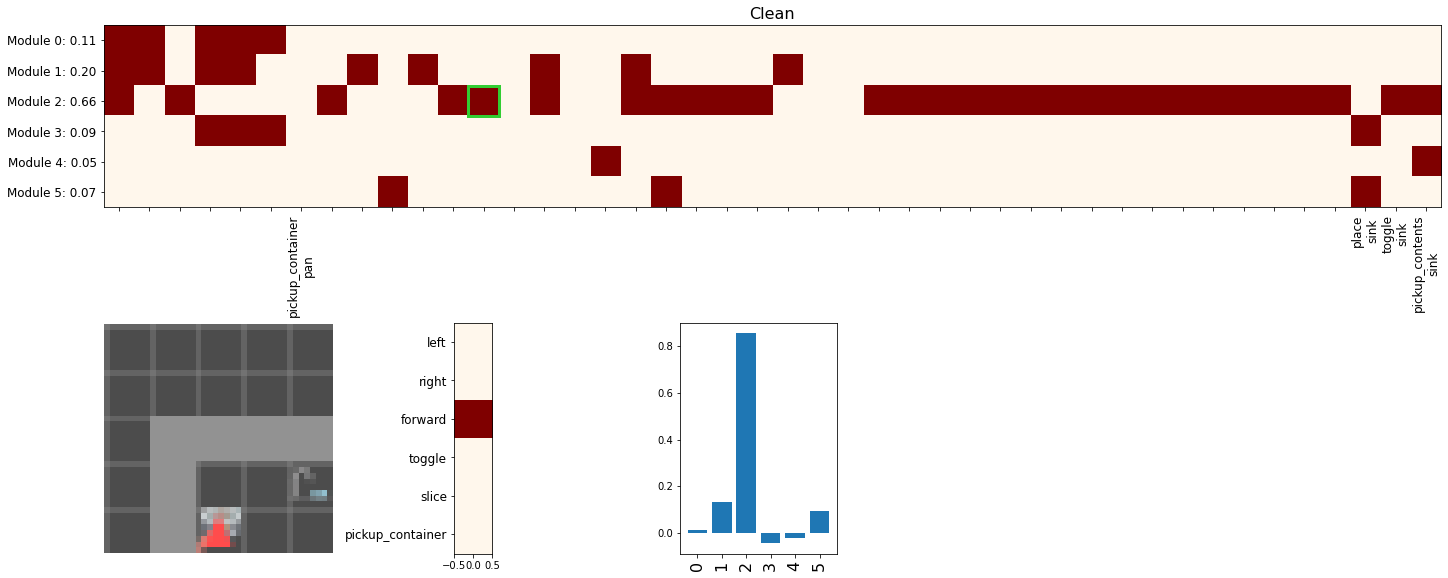

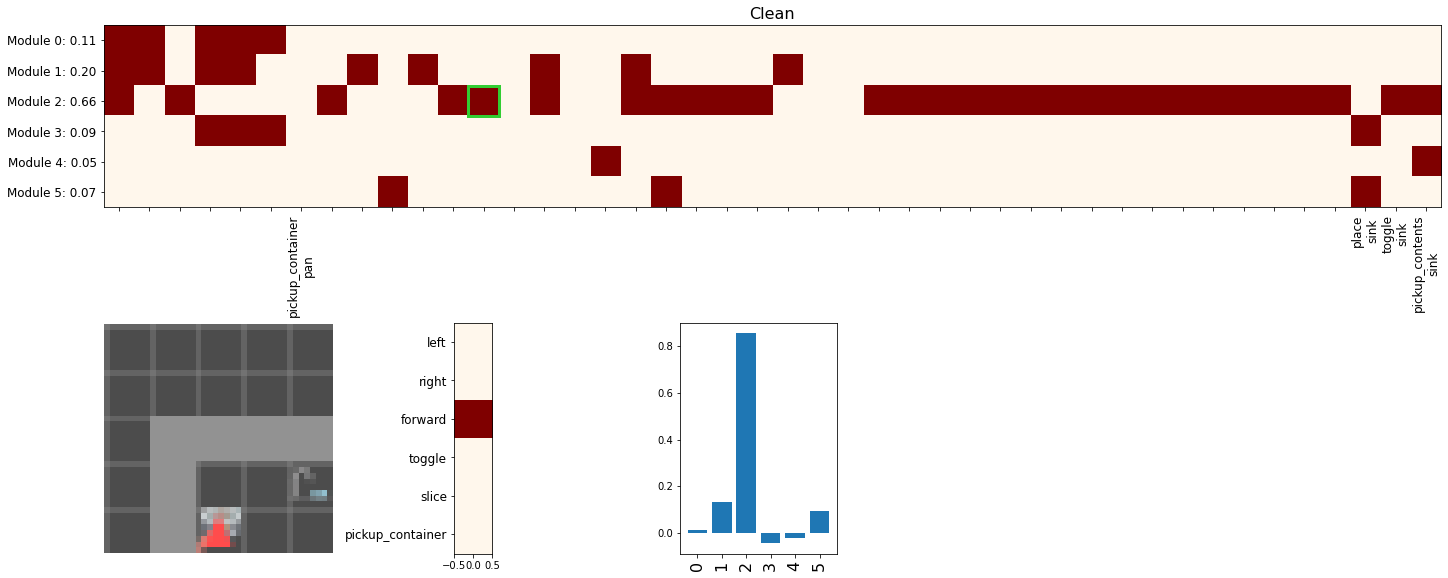

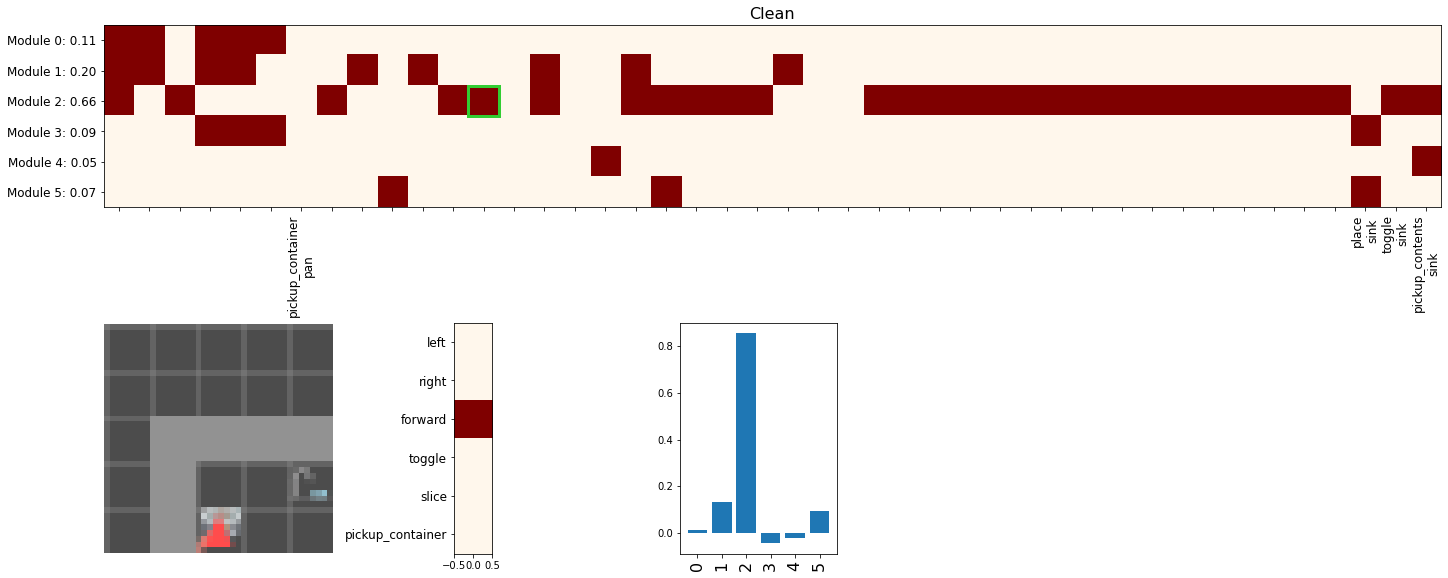

In [255]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas


episodes = plot_tools.split_episodes(data['clean'])
episode = episodes['success'][3]

def make_frame(episode, tdx):
    fig, axs = video_tools.make_grid(
        boxes=dict(
            q=dict(x=[0, 20], y=[4,8]),
            obs=dict(x=[0,4], y=[0,4]),
            qt=dict(x=[4,7], y=[0,4]),
            qaction=dict(x=[8,11], y=[0,4]),
        ),
    )
    canvas = FigureCanvas(fig)

    stats = plot_tools.get_sfz_stats(episode, config)
    tdx=12
    plot_tools.plot_agreement(
        ax=axs['q'],
        stats=stats,
        ax_time=axs['qt'],
        tdx=tdx,
        episode=episode,
        config=config,
        option='z',
        title='clean',
    )

    plot_tools.plot_image(
        ax=axs['obs'],
        episode=episode,
        tdx=tdx)

    plot_tools.plotq_action(
        ax=axs['qaction'],
        episode=episode,
        config=config,
        tdx=tdx)

    canvas.draw()       # draw the canvas, cache the renderer

    image_from_plot = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    x = image_from_plot.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    # buf = canvas.buffer_rgba()
    # # convert to a NumPy array
    # X = np.asarray(buf)
    return x
def make_frames(episode, maxt):
    ims = episode['observation']['image']
    T = len(ims)
    frames = []
    
    for tdx in range(T):
        frames.append(make_frame(episode, tdx))
        if tdx > maxt: break
    return frames

frames = make_frames(episode, maxt=4)

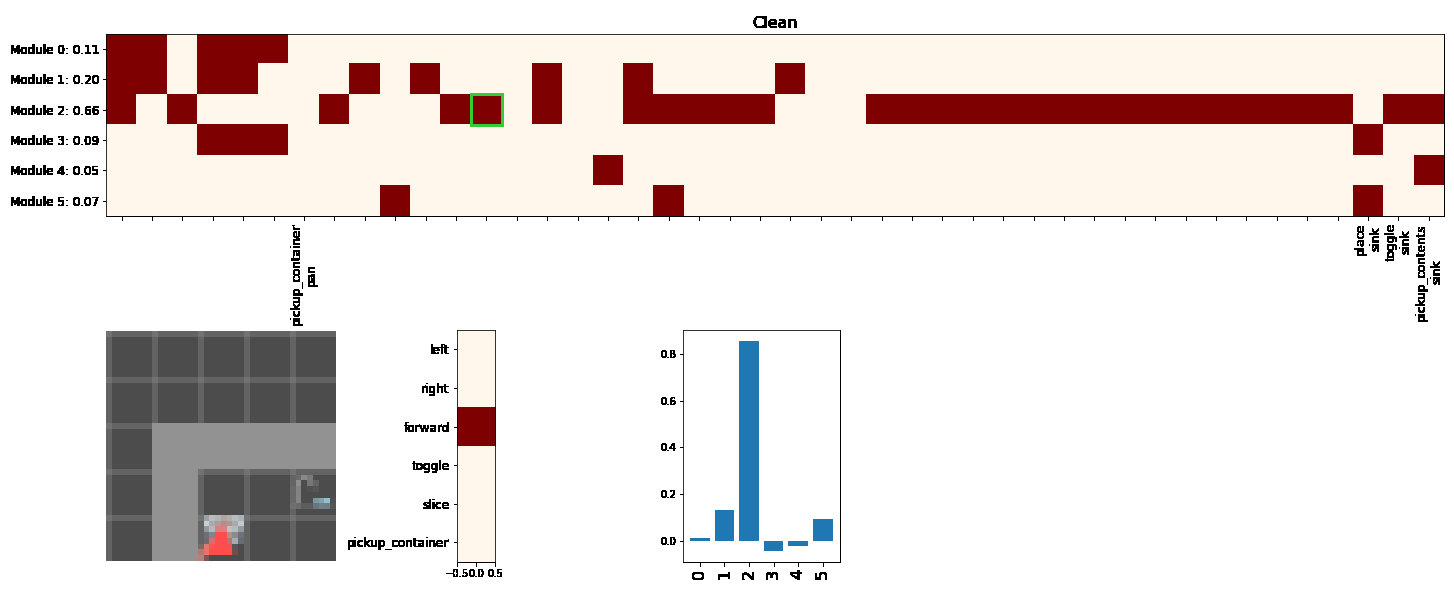

In [256]:
anim = make_animation(frames=np.array(frames), frame_rate=.5, figsize=None)

In [254]:
np.array(frames).shape

(6, 8)

In [ ]:
!conda install -c conda-forge ffmpeg


/bin/bash: /home/wcarvalh/miniconda3/envs/acmejax/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/wcarvalh/miniconda3/envs/acmejax

  added / updated specs:
    - ffmpeg


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.10.8  |       ha878542_0         139 KB  conda-forge
    certifi-2021.10.8          |   py39hf3d152e_2         145 KB  conda-forge
    ffmpeg-4.3.2               |       h37c90e5_3         9.9 MB  conda-forge
    openssl-1.1.1o             |       h166bdaf_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                   

In [ ]:
!y